# Look at all the stars for which you do have RVs.

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import tqdm

import astropy.stats as aps

import aviary as av

plotpar = {'axes.labelsize': 30,
           'font.size': 30,
           'legend.fontsize': 15,
           'xtick.labelsize': 30,
           'ytick.labelsize': 30,
           'text.usetex': True}
plt.rcParams.update(plotpar)

In [100]:
df = pd.read_csv("../../aviary/mc_san_gaia_lam.csv", low_memory=True)
gaia_mc = pd.read_csv("../../aviary/mc_san_gaia_lam.csv", low_memory=True)
print(np.shape(gaia_mc))
m = np.isfinite(gaia_mc.rv.values)
gaia_mc = gaia_mc.iloc[m]
print(np.shape(gaia_mc))

# # # Cut out photometric binaries and subgiants
# m = gaia_mc.flag.values == 1
# gaia_mc = gaia_mc.iloc[m]

# m = df.flag.values == 1
# df = df.iloc[m]

/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(35328, 181)
(11053, 181)


minimum teff star with RV =  3384.5435728327784
0.16748285994123407 of stars cooler than 5000 K have RVs
0.4003627295397869 of stars hotter than 5000 K have RVs
faintest star with RV =  16.585996627807614


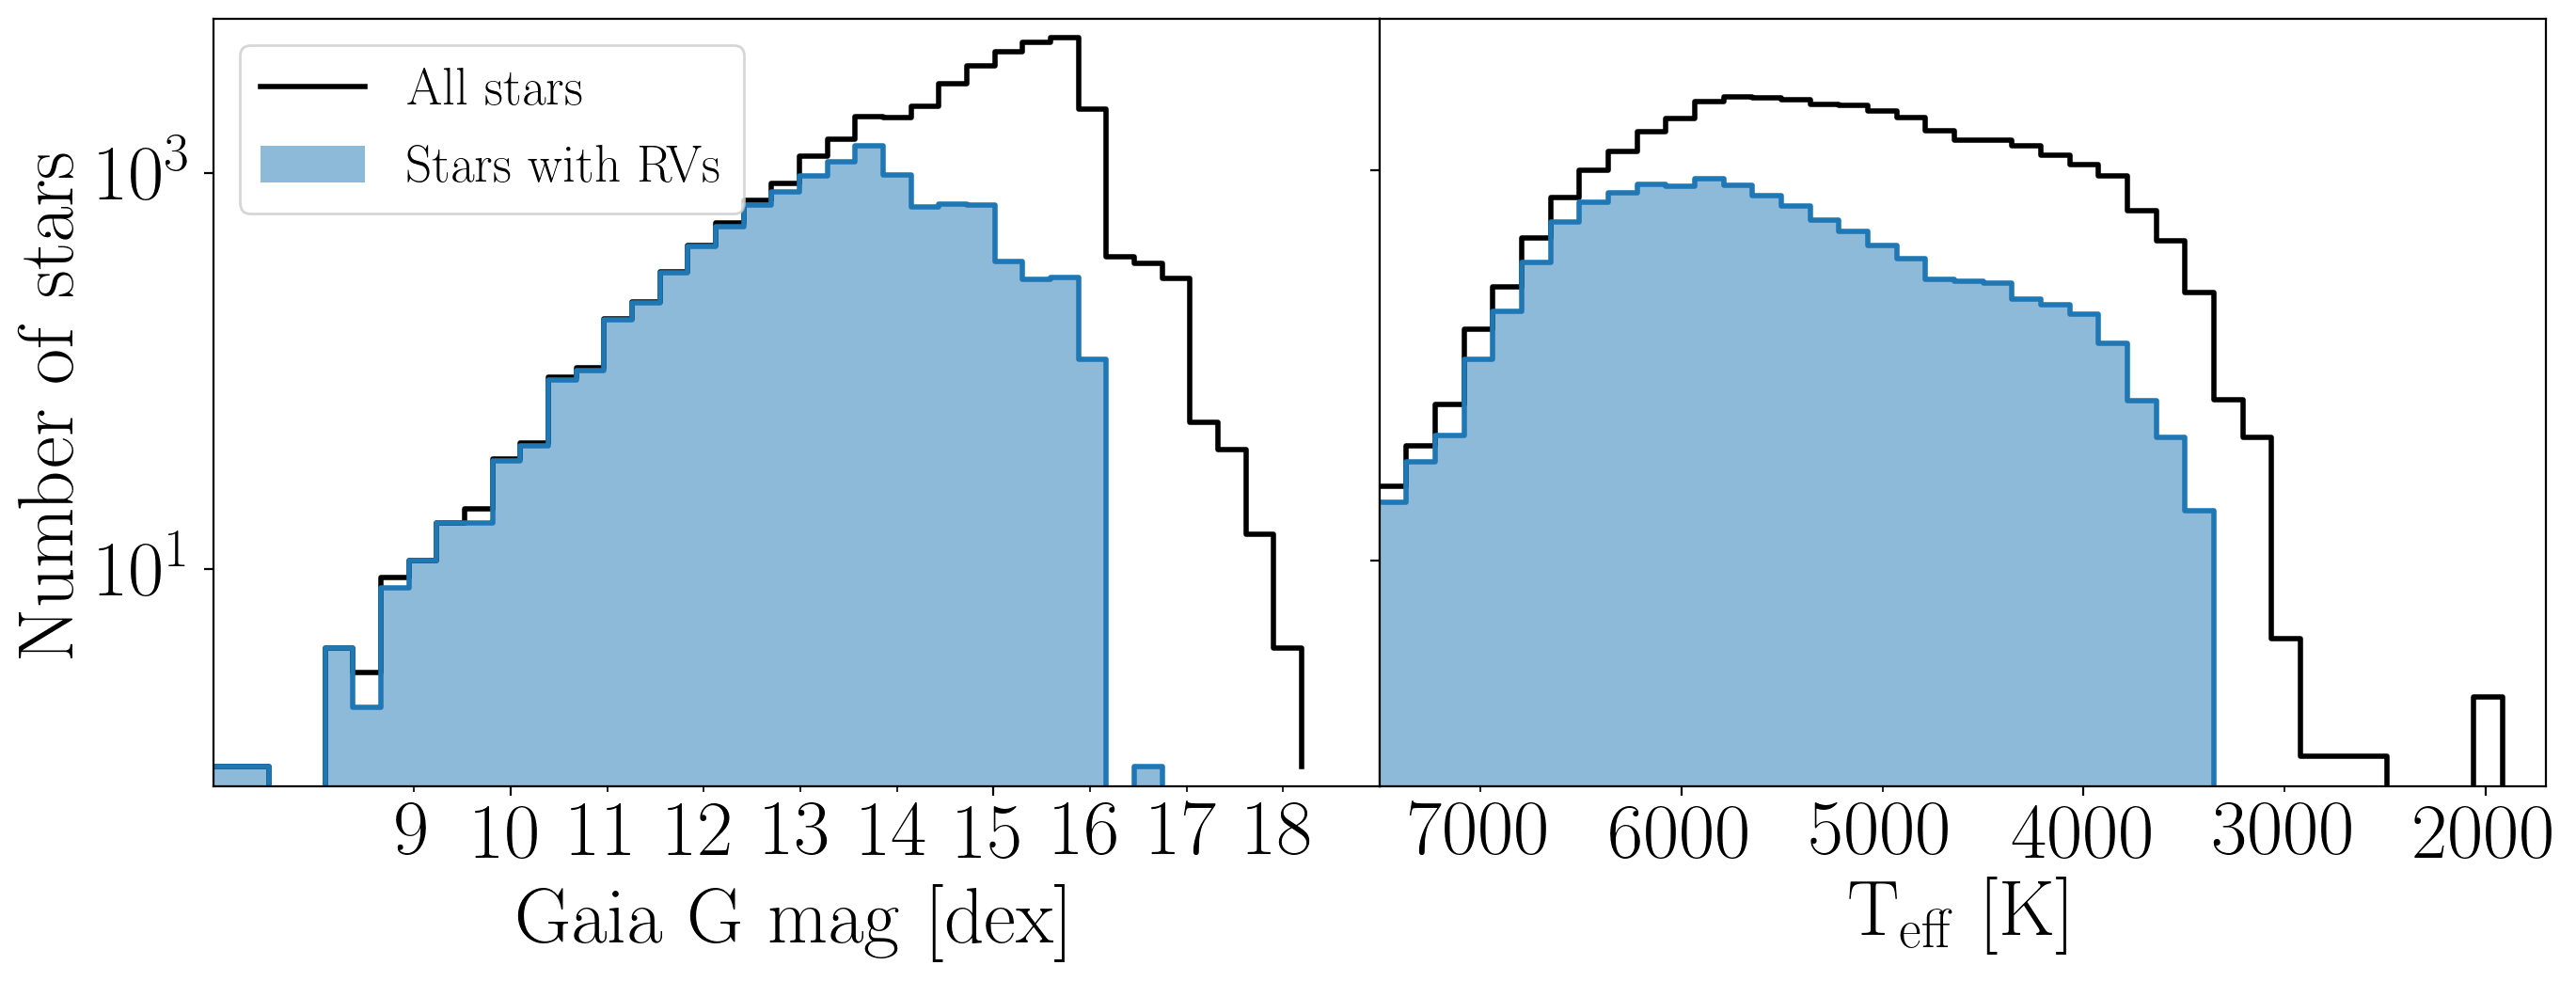

In [128]:
fig = plt.figure(figsize=(16, 6), dpi=200)

ax1 = fig.add_subplot(121)
n, bins = np.histogram(df.phot_g_mean_mag, 40)
ax1.step(bins[:-1], n, color="k", lw="2", where="post", label="$\mathrm{All~stars}$");
ax1.hist(gaia_mc.phot_g_mean_mag.values, bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(gaia_mc.phot_g_mean_mag.values, bins=bins)
ax1.step(bins[:-1], n, color="C0", lw=2, where="post");
ax1.set_xlabel("$\mathrm{Gaia~G~mag~[dex]}$");
ax1.set_ylabel("$\mathrm{Number~of~stars}$")
ax1.set_yscale("log")
ax1.set_xlim(bins[0], 19)
ax1.set_ylim(.8, 6000)
ax1.legend(loc="upper left", fontsize=20);
# ax1.set_xticklabels([])
ax1.xaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("$%.0f$"))
ax1.set_xticks([9, 10, 11, 12, 13, 14, 15, 16, 17, 18], minor=True)

ax2 = fig.add_subplot(122)
n, bins = np.histogram(df.color_teffs, 80)
ax2.step(bins[:-1], n, color="k", lw="2", where="post", label="$\mathrm{All~stars}$");
n, bins, _ = ax2.hist(gaia_mc.color_teffs.values, bins=bins, color="C0", alpha=.5, label="$\mathrm{Stars~with~RVs}$", rasterized=True);
n, bins = np.histogram(gaia_mc.color_teffs.values, bins=bins)
ax2.step(bins[:-1], n, color="C0", lw=2, where="post");
ax2.set_xlabel("$\mathrm{T_{eff}~[K]}$");
ax2.set_yscale("log")
ax2.set_xlim(7500, 1700)
ax2.set_ylim(.7, 6000)
ax2.set_yticklabels([])
ax2.xaxis.set_minor_formatter(matplotlib.ticker.FormatStrFormatter("$%.0f$"))
ax2.set_xticks([7000, 6000, 5000, 4000, 3000, 2000], minor=True)

# plt.tight_layout()
plt.subplots_adjust(wspace=.0, bottom=.2)

plt.savefig("rv_histogram")
plt.savefig("../../paper/rv_histogram.pdf")

print("minimum teff star with RV = ", min(gaia_mc.color_teffs.values))
print(sum(gaia_mc.color_teffs.values < 5000)/sum(df.color_teffs.values < 5000), "of stars cooler than 5000 K have RVs")
print(sum(gaia_mc.color_teffs.values > 5000)/sum(df.color_teffs.values > 5000), "of stars hotter than 5000 K have RVs")

print("faintest star with RV = ", max(gaia_mc.phot_g_mean_mag.values))

In [112]:
dt, dp = 500, .4

dispersions_bins = av.calc_dispersion_bins(gaia_mc.color_teffs.values,
                                           np.log10(gaia_mc.Prot.values),
                                           gaia_mc.vz.values,
                                           dt, dp)

 83%|████████▎ | 9157/11053 [00:01<00:00, 4748.91it/s]/Users/rangus/Applications/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
100%|██████████| 11053/11053 [00:02<00:00, 4671.04it/s]


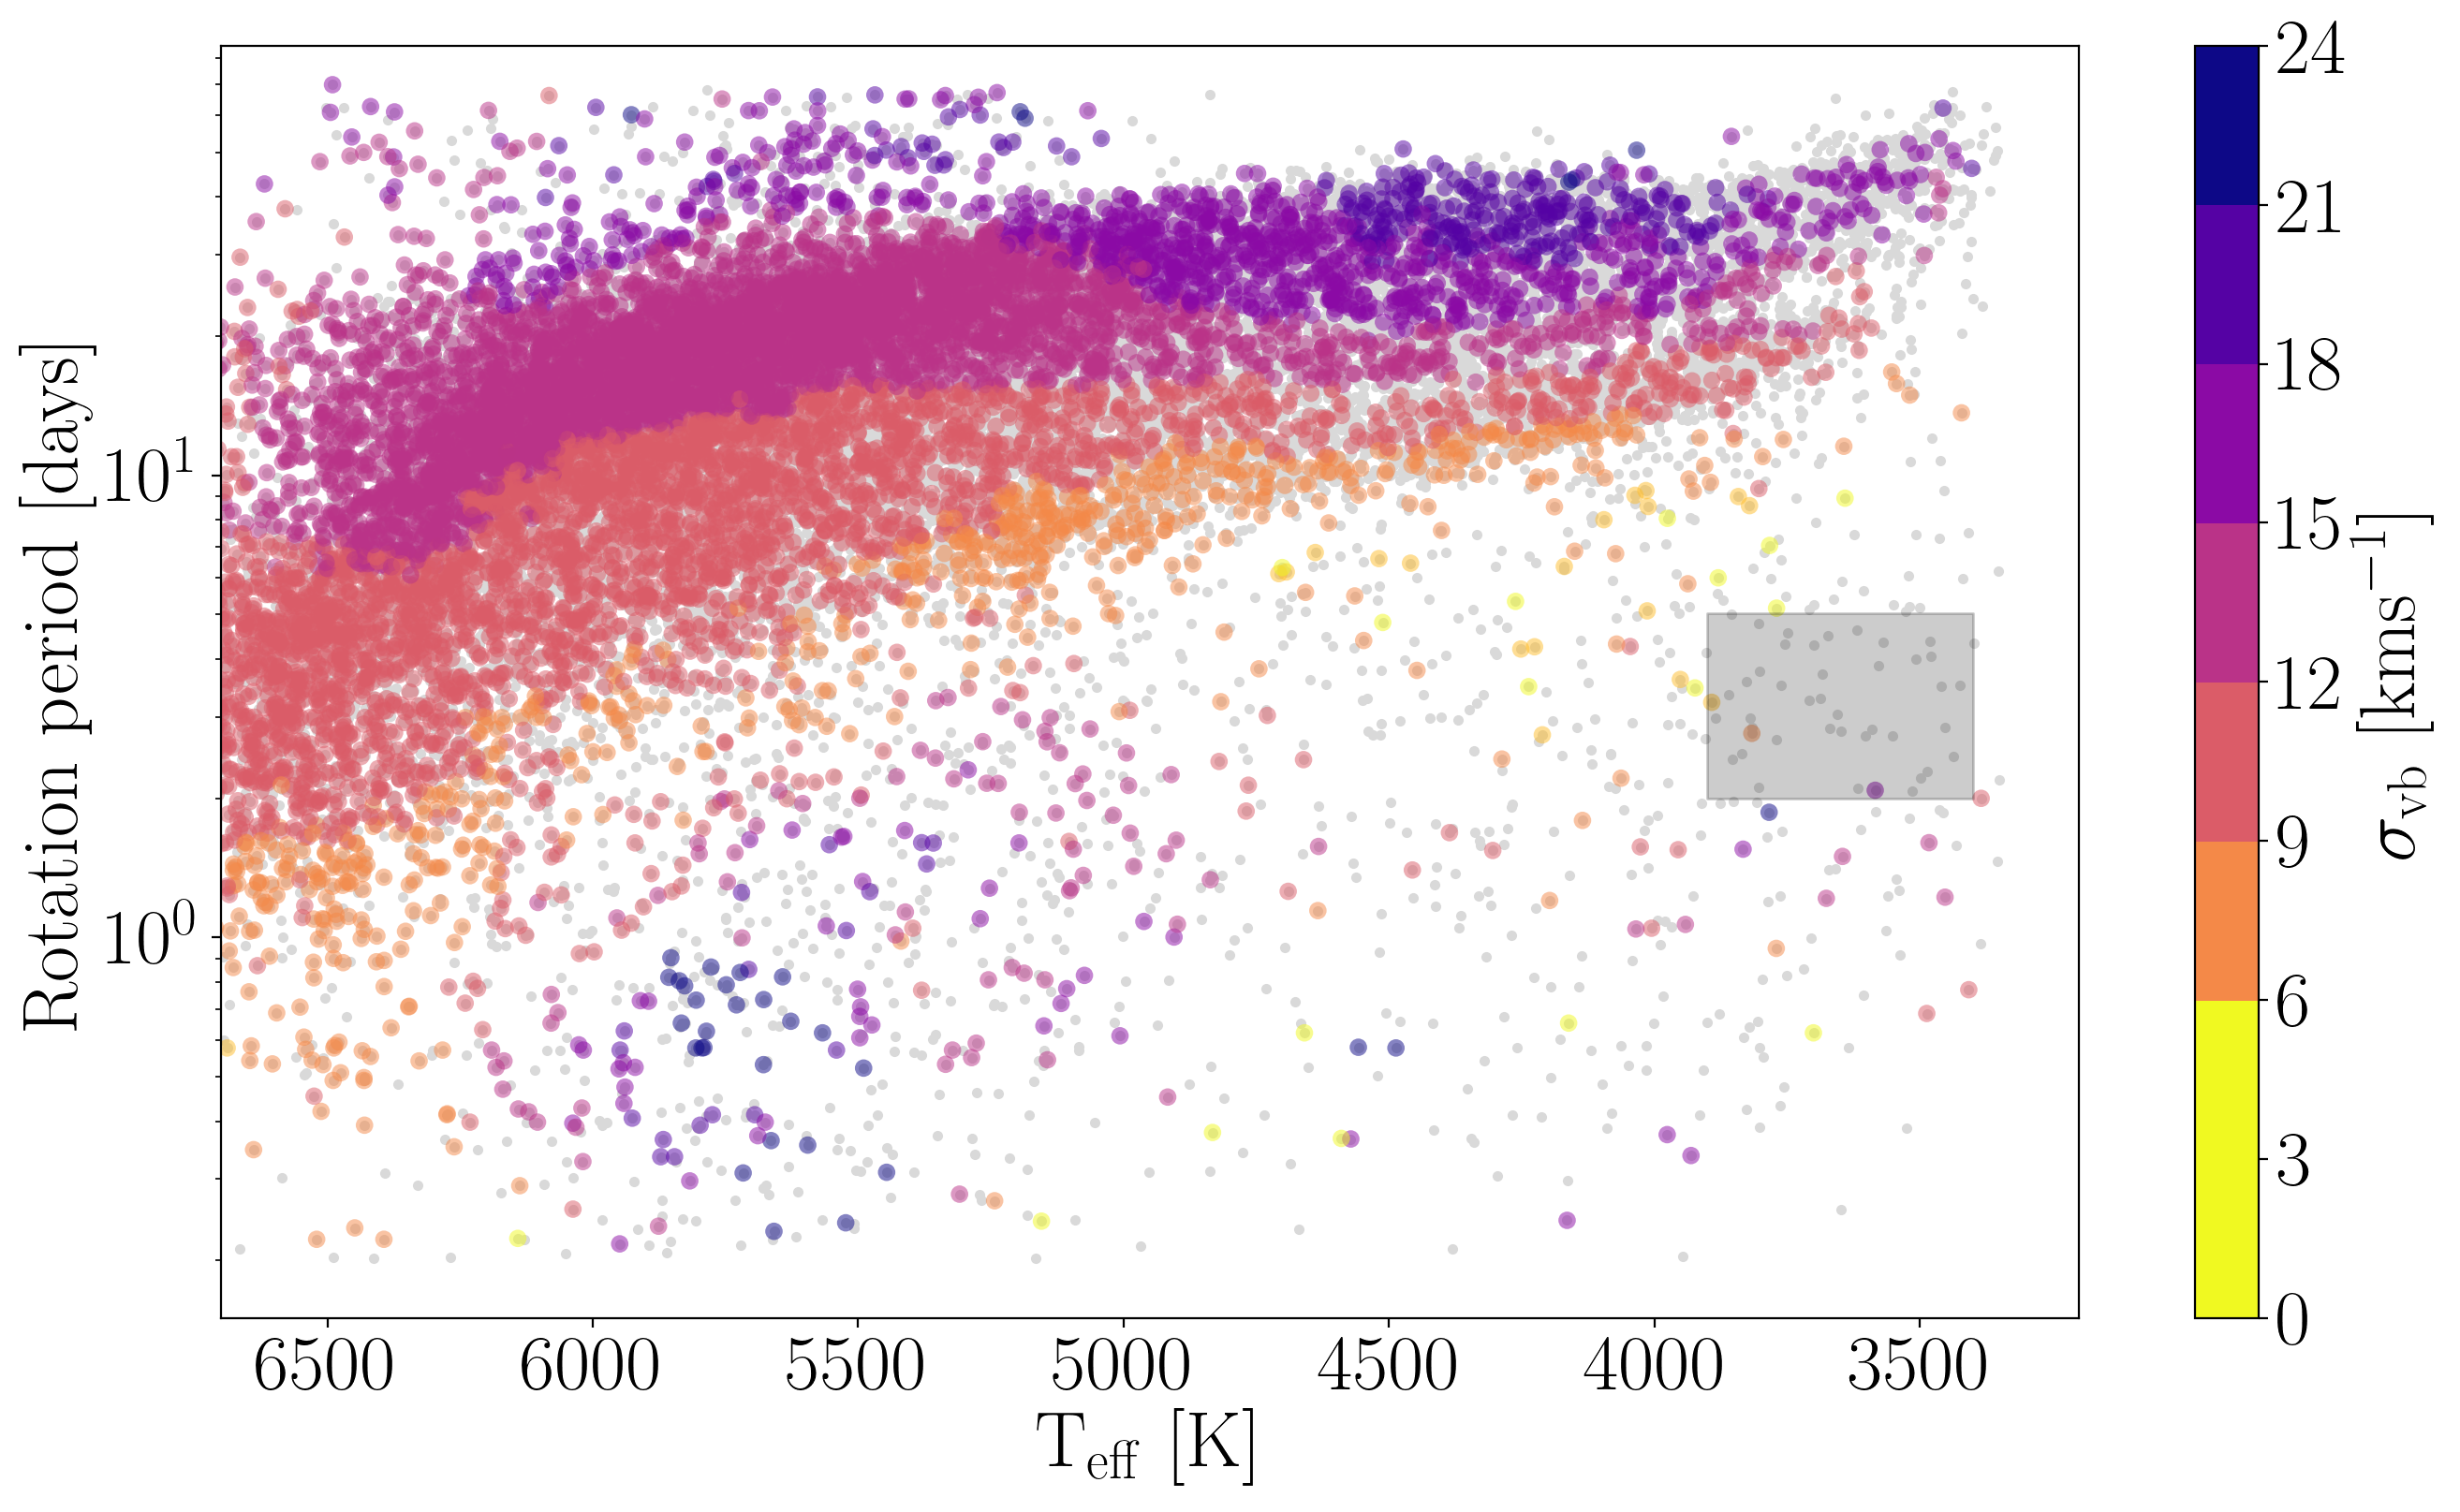

In [114]:
cmap = plt.cm.plasma_r
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 24, 9)
norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)

plt.figure(figsize=(16, 9), dpi=200)

plt.plot(df.color_teffs, df.Prot, ".", color=".85", zorder=0, rasterized=True)

plt.scatter(gaia_mc.color_teffs, gaia_mc.Prot, c=dispersions_bins,
            s=45, alpha=.5, edgecolor="", vmin=5, vmax=22, cmap=cmap, norm=norm, zorder=1, rasterized=True)
plt.yscale("log")
plt.xlim(6550, 3200)
plt.xlabel("$\mathrm{T_{eff}~[K]}$")
plt.ylabel("$\mathrm{Rotation~period~[days]}$")

color_bar = plt.colorbar(label="$\mathrm{\sigma_{vb}~[kms^{-1}]}$")
color_bar.set_alpha(1)
color_bar.draw_all()

xs = np.arange(3000, 6000, dt)
ys = 10**np.arange(1, 2, dp)
    
xspot, yspot = 3400, 2
xs = np.linspace(xspot, xspot+dt, 100)
plt.fill_between(xs, yspot, 10**(np.log10(yspot) + dp), color="k", alpha=.2)

plt.ylim(.15, 85)
plt.xlim(6700, 3200)
plt.savefig("lamost_vplot")
plt.savefig("../../paper/existing_rvs.pdf")